<a href="https://colab.research.google.com/github/LucasQCosta/Machine_Learning---Alura/blob/main/Classifica%C3%A7%C3%A3o_com_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
import pandas as pd

dados = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
dados = pd.read_csv(dados)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

x= dados[["principal","como_funciona","contato"]]
y= dados[["comprou"]]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = 20 ,test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

resultado = accuracy_score(teste_y, previsoes)

print(f'A acurácia: {resultado*100}%')

A acurácia: 54.629629629629626%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#Duas dimensões

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {
    'expected_hours' : 'Horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,Horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {
    0 : 1,
    1 : 0
}
dados['Finalizados'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,Horas_esperadas,preco,Finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='Horas_esperadas', ylabel='preco'>

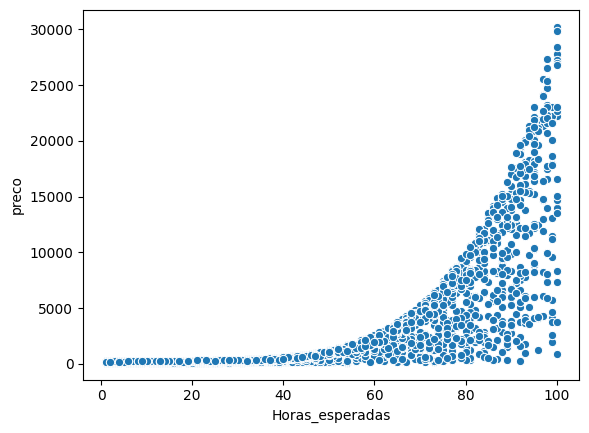

In [ ]:
import seaborn as sns
sns.scatterplot(x='Horas_esperadas', y='preco', data=dados)

<Axes: xlabel='Horas_esperadas', ylabel='preco'>

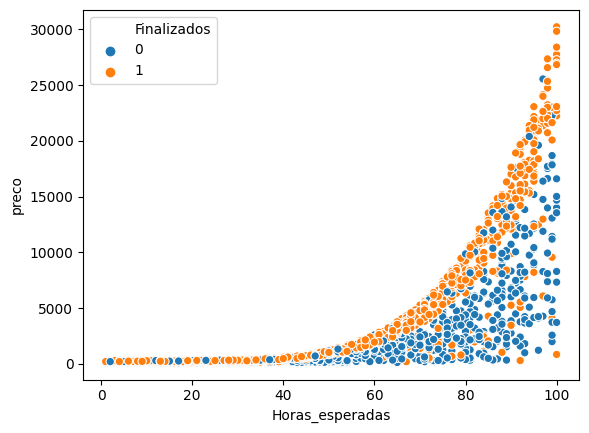

In [ ]:
sns.scatterplot(x='Horas_esperadas', y='preco', hue='Finalizados',data=dados)

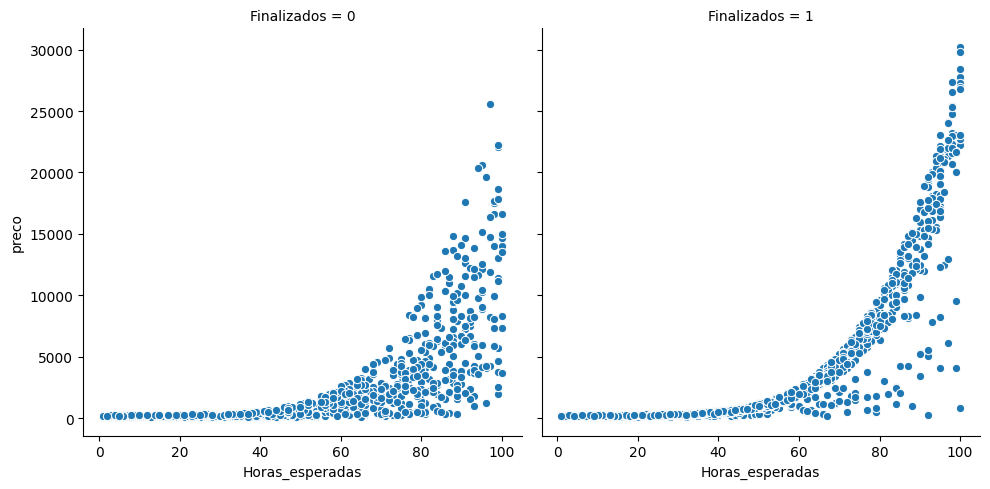

In [ ]:
sns.relplot(x='Horas_esperadas', y='preco', col='Finalizados',data=dados)

In [ ]:
x = dados[['Horas_esperadas', 'preco']]
y = dados['Finalizados']

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = 20 ,test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

resultado = accuracy_score(teste_y, previsoes)

print(f'Treinamos com {len(treino_x)} e testamos com {len(teste_x)}')
print(f'A acurácia: {resultado*100}%')

Treinamos com 1617 e testamos com 540
A acurácia: 52.03703703703704%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Curva de Decisão

x_min = teste_x.Horas_esperadas.min()
x_max = teste_x.Horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [ ]:
import numpy as np

pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/ pixel)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/ pixel)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

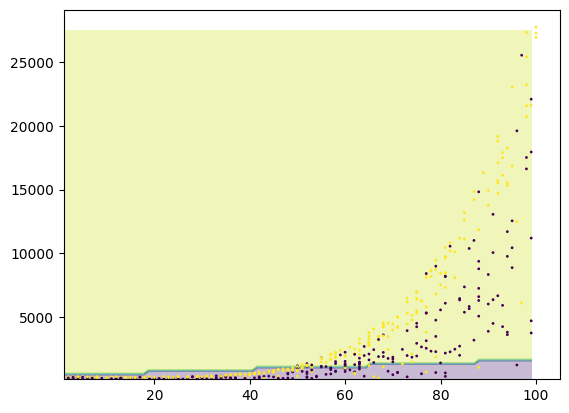

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.Horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [ ]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


## Árvore de Decisão

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'modelo_do_ano',
    'price': 'preco',
    'sold': 'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_do_ano,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


<Figure size 600x120 with 0 Axes>

In [ ]:
a_trocar = {
  'no': 0,
  'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_do_ano,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.modelo_do_ano
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_do_ano,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [ ]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_do_ano,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [ ]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "modelo_do_ano"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A Acurácia foi de: %.2f%%" % acuracia)

A Acurácia foi de: 58.00%
